#### 两张图像根据相似的特征匹配后，再根据相似的特征拼接

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image1 = cv2.imread(r"./image_file/zuo.jpeg")
image2 = cv2.imread(r"./image_file/you.jpeg")

(-0.5, 4607.5, 2127.5, -0.5)

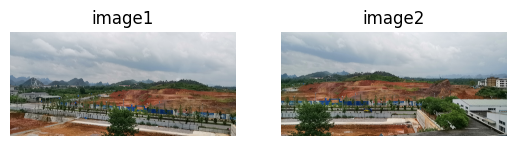

In [3]:
plt.subplot(1, 2, 1)
plt.title('image1')
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('image2')
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [4]:
A = image1.copy()
B = image2.copy()
imageA = cv2.resize(A, (0, 0), fx=0.2, fy=0.2)
imageB = cv2.resize(B, (0, 0), fx=0.2, fy=0.2)

In [5]:
# 检测A、B图片的SIFT关键特征点，并计算特征描述子
def detectAndDescribe(image):
    # 建立SIFT生成器
    sift = cv2.SIFT_create()
    # 检测SIFT特征点，并计算描述子
    (kps, features) = sift.detectAndCompute(image, None)
    # 将结果转换成NumPy数组
    kps = np.float32([kp.pt for kp in kps])
    # 返回特征点集，及对应的描述特征
    return (kps, features)

In [10]:
def show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
# 检测A、B图片的SIFT关键特征点，并计算特征描述子
kpsA, featuresA = detectAndDescribe(imageA)
kpsB, featuresB = detectAndDescribe(imageB)
# 建立暴力匹配器
bf = cv2.BFMatcher()
# 使用KNN检测来自A、B图的SIFT特征匹配对，K=2
matches = bf.knnMatch(featuresA, featuresB, 2)
good = []
for m in matches:
    # 当最近距离跟次近距离的比值小于ratio值时，保留此匹配对
    if len(m) == 2 and m[0].distance < m[1].distance * 0.75:
        # 存储两个点在featuresA, featuresB中的索引值
        good.append((m[0].trainIdx, m[0].queryIdx))

In [7]:
# 当筛选后的匹配对大于4时，计算视角变换矩阵
if len(good) > 4:
    # 获取匹配对的点坐标
    ptsA = np.float32([kpsA[i] for (_, i) in good])
    ptsB = np.float32([kpsB[i] for (i, _) in good])
    # 计算视角变换矩阵
    H, status = cv2.findHomography(ptsA, ptsB, cv2.RANSAC, 4.0)

In [8]:
# 匹配两张图片的所有特征点，返回匹配结果
M = (matches, H, status)
# 如果返回结果为空，没有匹配成功的特征点，退出程序
if M is None:
    print("无匹配结果")
    sys.exit()
# 否则，提取匹配结果
# H是3x3视角变换矩阵
(matches, H, status) = M

(-0.5, 1843.5, 425.5, -0.5)

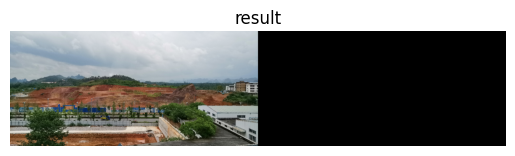

In [12]:
# 将图片A进行视角变换，result是变换后图片
result = cv2.warpPerspective(imageA, H, (imageA.shape[1] + imageB.shape[1], imageA.shape[0]))
# 将图片B传入result图片最左端
result[0:imageB.shape[0], 0:imageB.shape[1]] = imageB
# show('res', result)
plt.title('result')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')

 ### 示例2

In [13]:
ima = cv2.imread("./image_file/c-1.jpg")  # 下面的图片
imb = cv2.imread("./image_file/c-2.jpg")  # 上面的图片

(-0.5, 1826.5, 1562.5, -0.5)

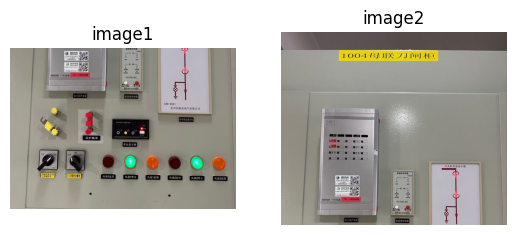

In [14]:
plt.subplot(1, 2, 1)
plt.title('image1')
plt.imshow(cv2.cvtColor(ima, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('image2')
plt.imshow(cv2.cvtColor(imb, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 1826.5, 2861.5, -0.5)

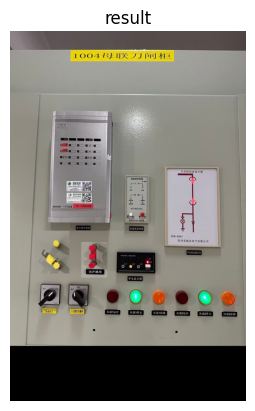

In [16]:
# 检测A、B图片的SIFT关键特征点，并计算特征描述子
kpsA, featuresA = detectAndDescribe(ima)
kpsB, featuresB = detectAndDescribe(imb)
# 建立暴力匹配器
bf = cv2.BFMatcher()
# 使用KNN检测来自A、B图的SIFT特征匹配对，K=2
matches = bf.knnMatch(featuresA, featuresB, 2)
good = []
for m in matches:
    # 当最近距离跟次近距离的比值小于ratio值时，保留此匹配对
    if len(m) == 2 and m[0].distance < m[1].distance * 0.75:
        # 存储两个点在featuresA, featuresB中的索引值
        good.append((m[0].trainIdx, m[0].queryIdx))

# 当筛选后的匹配对大于4时，计算视角变换矩阵
if len(good) > 4:
    # 获取匹配对的点坐标
    ptsA = np.float32([kpsA[i] for (_, i) in good])
    ptsB = np.float32([kpsB[i] for (i, _) in good])
    # 计算视角变换矩阵
    H, status = cv2.findHomography(ptsA, ptsB, cv2.RANSAC, 4.0)

# 匹配两张图片的所有特征点，返回匹配结果
M = (matches, H, status)
# 如果返回结果为空，没有匹配成功的特征点，退出程序
if M is None:
    print("无匹配结果")
    sys.exit()
# 否则，提取匹配结果
# H是3x3视角变换矩阵
(matches, H, status) = M
# 将图片A进行视角变换，result是变换后图片
result = cv2.warpPerspective(ima, H, (ima.shape[1], ima.shape[0] + imb.shape[0]))
# 将图片B传入result图片最左端
result[0:imb.shape[0], 0:imb.shape[1]] = imb
plt.title('result')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')